In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def kdj_divergence_factor(df, n=9, m=3, lookback=20):
    low_min = df['low'].rolling(n).min()
    high_max = df['high'].rolling(n).max()
    rsv = 100 * (df['close'] - low_min) / (high_max - low_min + 1e-8)
    K = rsv.ewm(alpha=1/m, adjust=False).mean()
    
    # Price and K extremes
    price_high = df['high'].rolling(lookback).max()
    price_low = df['low'].rolling(lookback).min()
    K_high = K.rolling(lookback).max()
    K_low = K.rolling(lookback).min()
    
    # Detect divergences
    bear_div = (df['close'] >= price_high) & (K < K_high)
    bull_div = (df['close'] <= price_low) & (K > K_low)
    return (bull_div.astype(int) - bear_div.astype(int)).replace(0, np.nan).ffill()

In [5]:
evaluator.set_factor(
    factor_data_or_func=kdj_divergence_factor,
    factor_name='kdj_divergence_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.018292
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.004672
   Rank_IC (Spearman): -0.003698
📊 信息比率:
   IR: nan
   有效分组数: 1
📊 因子分布:
📋 数据概况:
   数据长度: 109996
   因子列: kdj_divergence_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


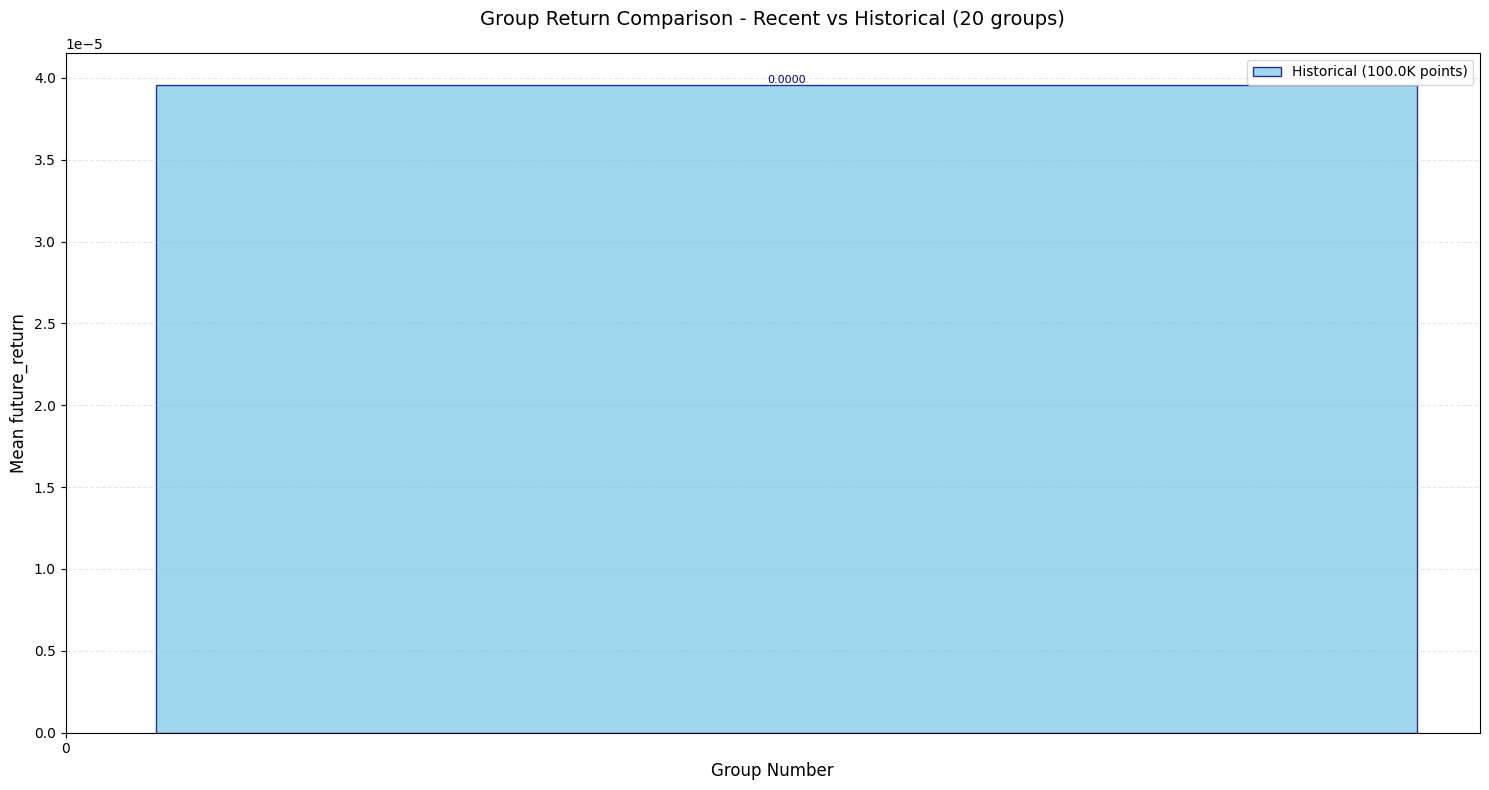

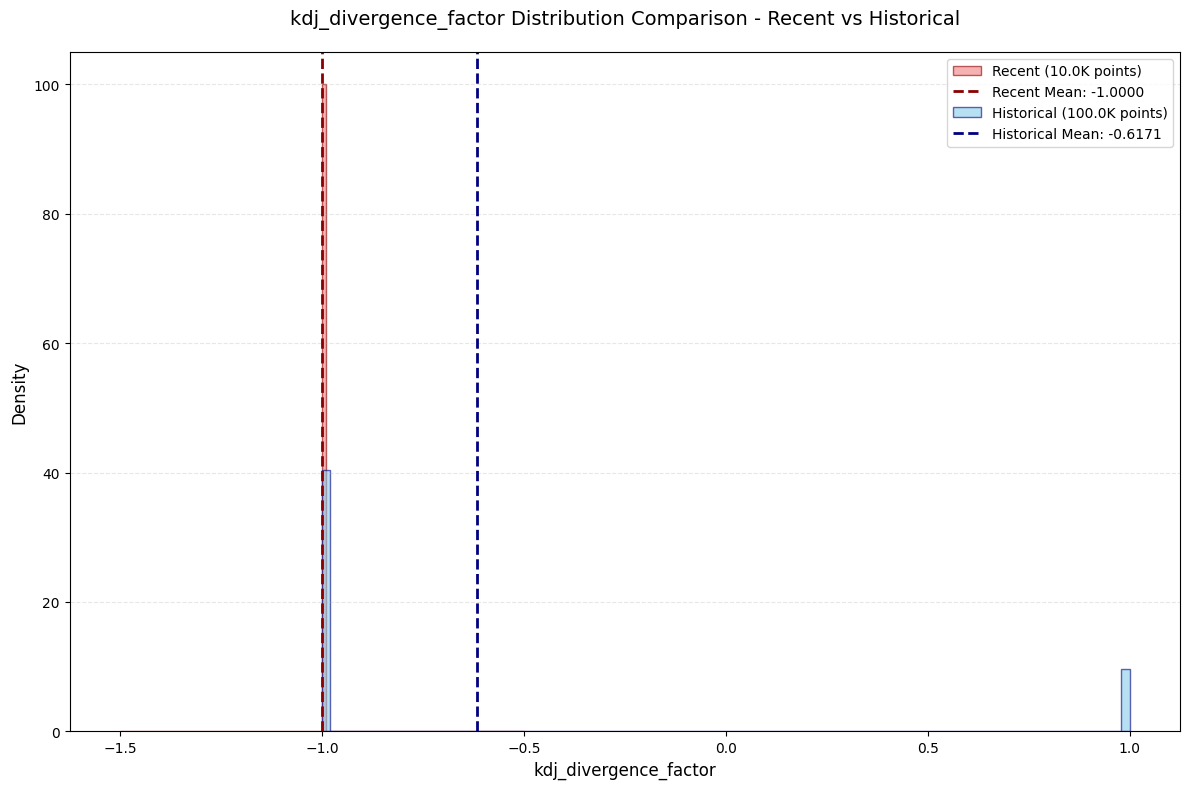

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)